# **Ultimate Technologies Take-Home Challenge**
**Part I - Exploratory Data Analysis**

By: Nicole Quevillon

February 2025

**Context:** Ultimate Tchnologies Inc. is a ride-share app. This data contains the timestamps of driver logins

**The Ask:** Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

**Findings:** For findings, please scroll to the Final Summary section at the bottom of the file

# **File Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Description:** The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.

In [ ]:
file_path = '/content/drive/My Drive/Springboard/Ultimate Technologies Take-Home/logins.json'
logins = pd.read_json(file_path)

print(logins.shape)

(93142, 1)


In [ ]:
colour1 = '#43a2ca'
colour2 = '#d8b365'
colour3 = '#5ab4ac'
colour4 = '#018571'

# **Data Prep**

In [ ]:
#Our data has a single column with timestamps and contains no nulls
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [ ]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [ ]:
#Lets start by breaking this out into standard time aggregations
logins['year'] = pd.DatetimeIndex(logins['login_time']).year
logins['month'] = pd.DatetimeIndex(logins['login_time']).month
logins['day'] = pd.DatetimeIndex(logins['login_time']).day
logins['date'] = pd.DatetimeIndex(logins['login_time']).date
logins['time'] = pd.DatetimeIndex(logins['login_time']).time
logins['hour'] = pd.DatetimeIndex(logins['login_time']).hour
logins['minute'] = pd.DatetimeIndex(logins['login_time']).minute
logins['day_of_week'] = pd.DatetimeIndex(logins['login_time']).day_name()

In [ ]:
#Confirming it has populated correctly
logins.head()

,login_time,year,month,day,date,time,hour,minute,day_of_week
0,1970-01-01 20:13:18,1970,1,1,1970-01-01,20:13:18,20,13,Thursday
1,1970-01-01 20:16:10,1970,1,1,1970-01-01,20:16:10,20,16,Thursday
2,1970-01-01 20:16:37,1970,1,1,1970-01-01,20:16:37,20,16,Thursday
3,1970-01-01 20:16:36,1970,1,1,1970-01-01,20:16:36,20,16,Thursday
4,1970-01-01 20:26:21,1970,1,1,1970-01-01,20:26:21,20,26,Thursday


In [ ]:
#Confirming there are no nulls
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   login_time   93142 non-null  datetime64[ns]
 1   year         93142 non-null  int32         
 2   month        93142 non-null  int32         
 3   day          93142 non-null  int32         
 4   date         93142 non-null  object        
 5   time         93142 non-null  object        
 6   hour         93142 non-null  int32         
 7   minute       93142 non-null  int32         
 8   day_of_week  93142 non-null  object        
dtypes: datetime64[ns](1), int32(5), object(3)
memory usage: 4.6+ MB


In [ ]:
#Adding a 15 min interval aggregation
bins = [0,15,30,45,60]
labels = ['00', '15', '30', '45']
logins['15min_interval'] = pd.cut(logins['minute'], bins=bins, labels=labels, right=False)

In [ ]:
#Interval classification looks to be working correctly
logins.head()

,login_time,year,month,day,date,time,hour,minute,day_of_week,15min_interval
0,1970-01-01 20:13:18,1970,1,1,1970-01-01,20:13:18,20,13,Thursday,00
1,1970-01-01 20:16:10,1970,1,1,1970-01-01,20:16:10,20,16,Thursday,15
2,1970-01-01 20:16:37,1970,1,1,1970-01-01,20:16:37,20,16,Thursday,15
3,1970-01-01 20:16:36,1970,1,1,1970-01-01,20:16:36,20,16,Thursday,15
4,1970-01-01 20:26:21,1970,1,1,1970-01-01,20:26:21,20,26,Thursday,15


In [ ]:
logins['15min_interval'].value_counts()

,count
15min_interval,
30,23962
45,23545
15,22975
00,22660


In [ ]:
logins['hour'].unique()

array([20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
       13, 14, 15, 16, 17, 18, 19], dtype=int32)

In [ ]:
#We want to keep the leading 0s so that we can create a concatenated time column with our 15min_intervals
logins['hour'] = logins['hour'].apply(lambda x: f'{x:02d}')

In [ ]:
#This is correct
logins['hour'].unique()

array(['20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19'], dtype=object)

In [ ]:
#Create a new time column with hour and 15 min interval
logins['time_interval'] = logins['hour'] + ':' + logins['15min_interval'].astype(str)

In [ ]:
#Perfect!
logins.head()

,login_time,year,month,day,date,time,hour,minute,day_of_week,15min_interval,time_interval
0,1970-01-01 20:13:18,1970,1,1,1970-01-01,20:13:18,20,13,Thursday,00,20:00
1,1970-01-01 20:16:10,1970,1,1,1970-01-01,20:16:10,20,16,Thursday,15,20:15
2,1970-01-01 20:16:37,1970,1,1,1970-01-01,20:16:37,20,16,Thursday,15,20:15
3,1970-01-01 20:16:36,1970,1,1,1970-01-01,20:16:36,20,16,Thursday,15,20:15
4,1970-01-01 20:26:21,1970,1,1,1970-01-01,20:26:21,20,26,Thursday,15,20:15


# **Data Validation**

**Findings:**

*   All Data is listed as the same year '1970' which is likely an error
*   Data ranges from Jan 01 to April 13
*   Our day of week flags look to be correctly applied despite the wrong year
*   Logins look cyclical at a weekly level







In [ ]:
#Confirming our login data date range
print('Earliest Login: ', logins['login_time'].min())
print('Latest login: ', logins['login_time'].max())

#Jan 01, 1970 to April 13, 1970

Earliest Login:  1970-01-01 20:12:16
Latest login:  1970-04-13 18:57:38


**Year field**

In [ ]:
logins['year'].value_counts()

#All data is showing from the same year, 1970, which is likely an error since this technology did not exist at the time

,count
year,
1970,93142


**Month field**

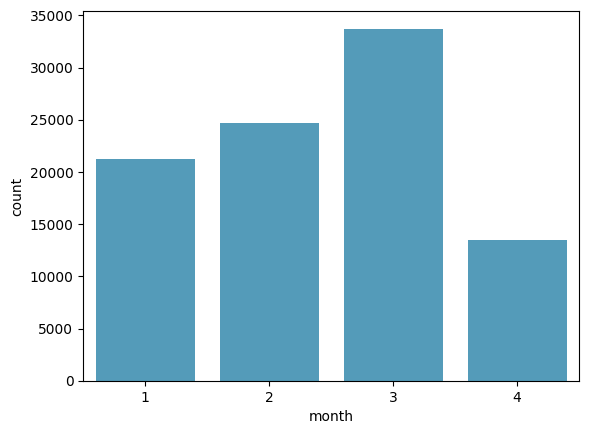

In [ ]:
sns.countplot(x='month', data=logins, color=colour1)
plt.show()

#logins increase over the 3 full months that we have data for

**Over Time Trend Check**

In [ ]:
#Aggregate our data to a daily level
daily_agg = logins.groupby('date').agg(total_logins=('login_time', 'count'))

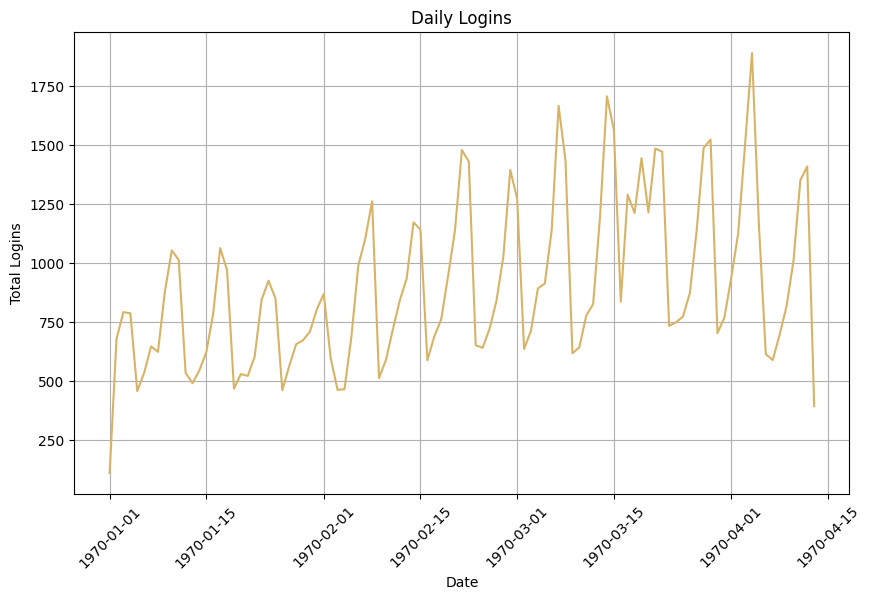

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_agg.index, daily_agg['total_logins'], color=colour2)

plt.title('Daily Logins')
plt.xlabel('Date')
plt.ylabel('Total Logins')
plt.xticks(rotation=45)

plt.grid(True)

plt.show()

#Our data is very cyclical at what looks like a weekly level
#There is one section in the second half of March where the weekly trend seems to be thrown off a bit

**Date of Week Validation**

If our year is wrong, the day of week classifier could be calculated incorrectly. Lets take a look

In [ ]:
#plot the average number of logins by day
weekly_agg = logins.groupby('day_of_week').agg(total_logins=('login_time', 'count'),
                                              distinct_days=('date', 'nunique'))

In [ ]:
weekly_agg.sort_values('total_logins', ascending=False).head(7)

#We have data for all days of the week
#It is a bit suspicious that Wed and Tues only have 14 instances while everything else has 15. This might a product of the start/end cutoff.

,total_logins,distinct_days
day_of_week,,
Saturday,19377,15
Sunday,18167,15
Friday,15208,15
Thursday,11960,15
Wednesday,10339,14
Tuesday,9268,14
Monday,8823,15


In [ ]:
#This confirms there are no missing dates in the middle of our date ranges
daily_agg.reset_index(drop=False, inplace=True)

daily_agg = daily_agg.sort_values(by='date')
daily_agg['date_diff'] = daily_agg['date'].diff()
gaps = daily_agg[daily_agg['date_diff'] > pd.Timedelta(days=1)]
print(gaps)

Empty DataFrame
Columns: [date, total_logins, date_diff]
Index: []


In [ ]:
#Average logins by weekday
weekly_agg['avg_logins'] = weekly_agg['total_logins']/weekly_agg['distinct_days']
weekly_agg = weekly_agg.sort_values('avg_logins', ascending=False)
print(weekly_agg)

#The below login trends by day of week match what we understand of the data
#Weekend are being the busiest, so our labels are likely correct despite the wrong year on the login datetime

             total_logins  distinct_days   avg_logins
day_of_week                                          
Saturday            19377             15  1291.800000
Sunday              18167             15  1211.133333
Friday              15208             15  1013.866667
Thursday            11960             15   797.333333
Wednesday           10339             14   738.500000
Tuesday              9268             14   662.000000
Monday               8823             15   588.200000


In [ ]:
weekly_agg.reset_index(drop=False, inplace=True)
weekly_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day_of_week    7 non-null      object 
 1   total_logins   7 non-null      int64  
 2   distinct_days  7 non-null      int64  
 3   avg_logins     7 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 356.0+ bytes


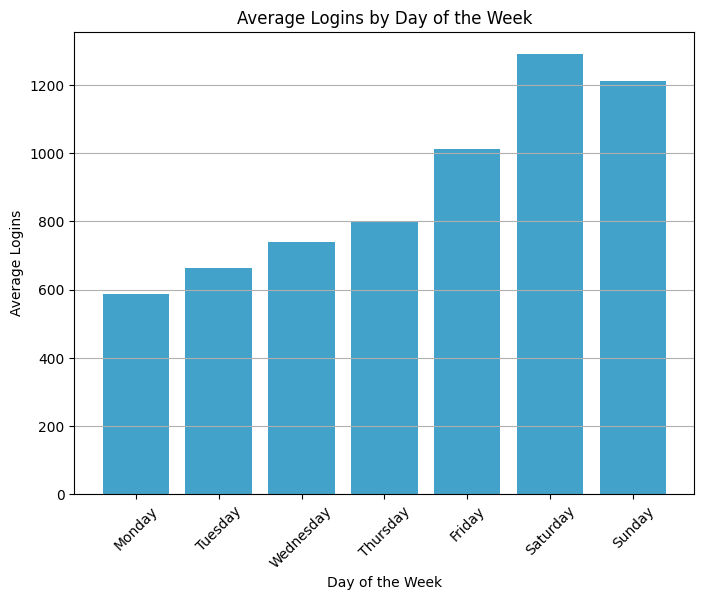

In [ ]:
#Display average logins by day of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_agg['day_of_week'] = pd.Categorical(weekly_agg['day_of_week'], categories=ordered_days, ordered=True)

# Sort the DataFrame based on the categorical order
weekly_agg = weekly_agg.sort_values('day_of_week')

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(weekly_agg['day_of_week'], weekly_agg['avg_logins'], color=colour1)
plt.title('Average Logins by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Logins')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

#Weekends are the busiest for logins with Saturday being the peak. Sunday is the 2nd busiest day
#Logins drop drastically after the weekend and slowly ramp up throughout the weekdays. Friday is the 3rd busiest day

# **Time of Day Trends**

Now that we've validated the date data, let's take a look at the time of day trends

In [ ]:
hour_of_day_summary = logins.groupby('hour').agg(total_logins=('login_time', 'count'),
                                              distinct_days=('date', 'nunique'))

In [ ]:
hour_of_day_summary['avg_logins'] = hour_of_day_summary['total_logins']/102
hour_of_day_summary.reset_index(drop=False, inplace=True)

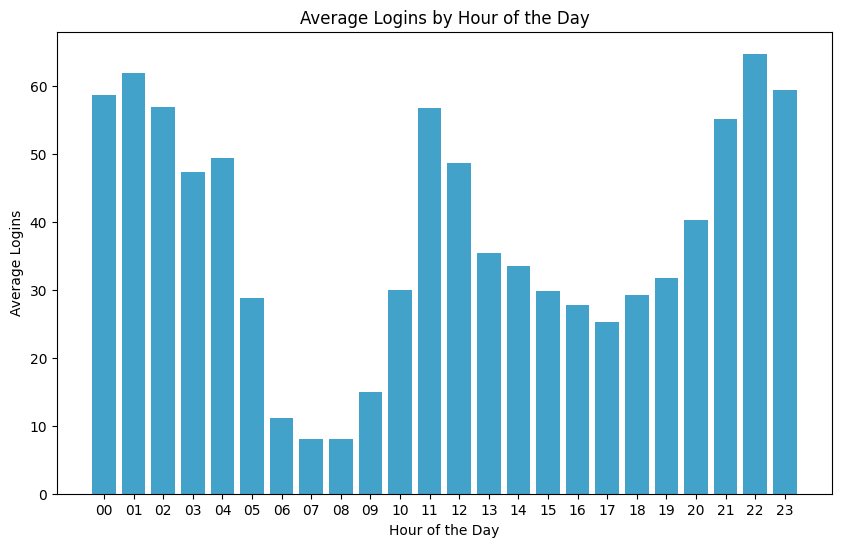

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(hour_of_day_summary['hour'], hour_of_day_summary['avg_logins'], color=colour1)
plt.title('Average Logins by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Logins')
plt.show()

#At a high level we see the lowest logins between 5am and 10am.

**Weekday vs Weekend**

Let's create a new weekday vs weekend classification to see if that adds some clarity

In [ ]:
weekend = ['Saturday', 'Sunday']
logins['weekday'] = np.where(logins['day_of_week'].isin(weekend), 'weekend', 'weekday')

In [ ]:
logins['weekday'].value_counts()

,count
weekday,
weekday,55598
weekend,37544


In [ ]:
weekend_hour_summary = logins[logins['weekday']=='weekend'].groupby('hour').agg(total_logins=('login_time', 'count'),
                                              distinct_days=('date', 'nunique'))

weekend_hour_summary['avg_logins'] = weekend_hour_summary['total_logins']/102 #There are 102 instances of every hour
weekend_hour_summary.reset_index(drop=False, inplace=True)

In [ ]:
weekday_hour_summary = logins[logins['weekday']=='weekday'].groupby('hour').agg(total_logins=('login_time', 'count'),
                                              distinct_days=('date', 'nunique'))

weekday_hour_summary['avg_logins'] = weekday_hour_summary['total_logins']/102 #There are 102 instances of every hour
weekday_hour_summary.reset_index(drop=False, inplace=True)

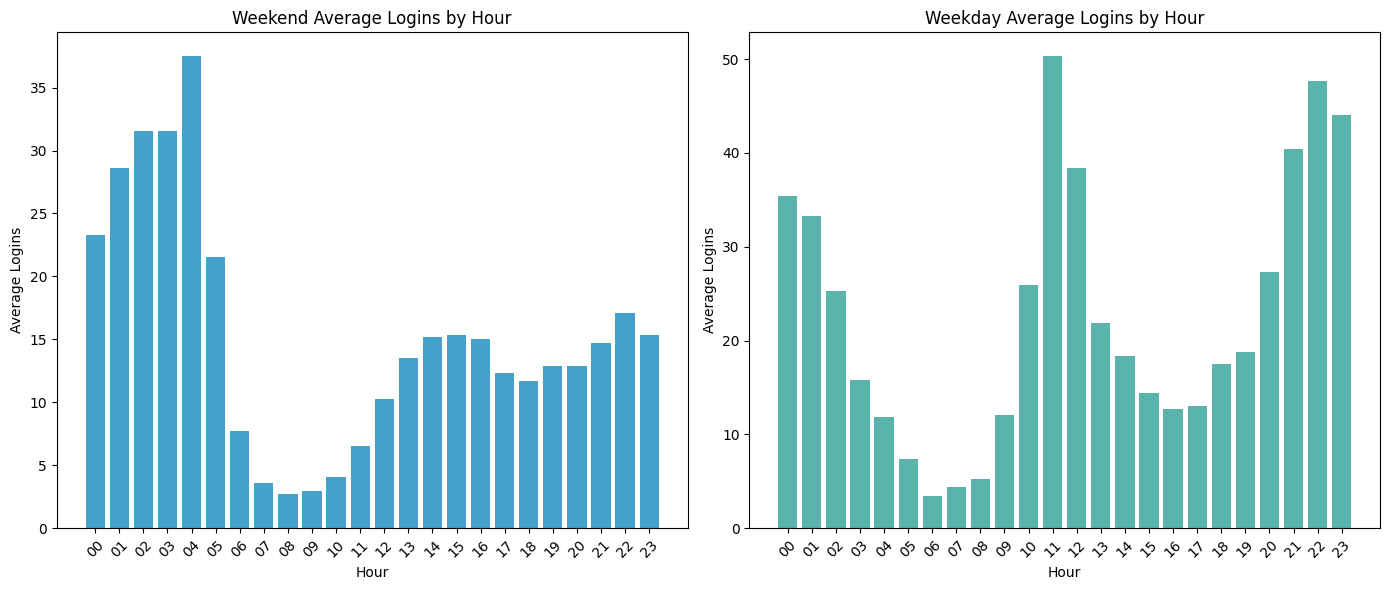

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(weekend_hour_summary['hour'], weekend_hour_summary['avg_logins'], color=colour1)
axes[0].set_title('Weekend Average Logins by Hour')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Average Logins')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(weekday_hour_summary['hour'], weekday_hour_summary['avg_logins'], color=colour3)
axes[1].set_title('Weekday Average Logins by Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Average Logins')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#We see very different time of day patterns by weekday vs weekend
#On weekends there is one very large spike between midnight and 4am
#On weekdays there are two distinct peak periods: one short one around lunch (11-12), and another from 9pm to about 1am

Now that we've established the high-level hourly trends, let's take a look at the more granular trends.

In [ ]:
#Lets take a look at how logins shift over these 15 minute intervals for weekdays and weekends
weekday_interval_summary = logins[logins['weekday']=='weekday'].groupby('time_interval').agg(total_logins=('login_time', 'count'),
                                              num_days=('date', 'nunique'))

weekday_interval_summary.reset_index(drop=False, inplace=True)

In [ ]:
weekend_interval_summary = logins[logins['weekday']=='weekend'].groupby('time_interval').agg(total_logins=('login_time', 'count'),
                                              num_days=('date', 'nunique'))

weekend_interval_summary.reset_index(drop=False, inplace=True)

In [ ]:
merged_interval_summary = pd.merge(weekend_interval_summary, weekday_interval_summary, on='time_interval', suffixes=('_weekend', '_weekday'))
merged_interval_summary

,time_interval,total_logins_weekend,num_days_weekend,total_logins_weekday,num_days_weekday
0,00:00,557,30,882,72
1,00:15,603,30,944,72
2,00:30,610,30,915,72
3,00:45,607,30,875,72
4,01:00,636,30,913,72
...,...,...,...,...,...
91,22:45,459,30,1178,72
92,23:00,394,30,1179,72
93,23:15,393,30,1159,72
94,23:30,377,30,1079,72


In [ ]:
#Since there are different number of days for weekend vs weekdays, we need to add an average column before we can compare
merged_interval_summary['avg_logins_weekend'] = round(merged_interval_summary['total_logins_weekend']/merged_interval_summary['num_days_weekend'],0)
merged_interval_summary['avg_logins_weekday'] = round(merged_interval_summary['total_logins_weekday']/merged_interval_summary['num_days_weekday'],0)

In [ ]:
merged_interval_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time_interval         96 non-null     object 
 1   total_logins_weekend  96 non-null     int64  
 2   num_days_weekend      96 non-null     int64  
 3   total_logins_weekday  96 non-null     int64  
 4   num_days_weekday      96 non-null     int64  
 5   avg_logins_weekend    96 non-null     float64
 6   avg_logins_weekday    96 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 5.4+ KB


# **Final Summary**

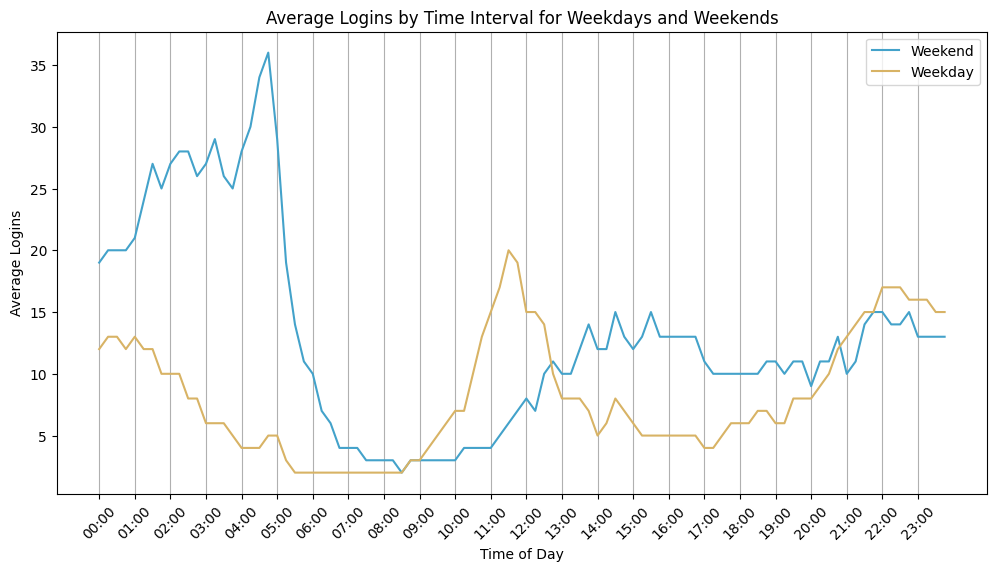

In [ ]:
#Plot the avg logins for weekend and weekday by time_interval
plt.figure(figsize=(12, 6))

plt.plot(merged_interval_summary['time_interval'], merged_interval_summary['avg_logins_weekend'], color=colour1, label='Weekend')
plt.plot(merged_interval_summary['time_interval'], merged_interval_summary['avg_logins_weekday'], color=colour2, label='Weekday')



plt.title('Average Logins by Time Interval for Weekdays and Weekends')
plt.xlabel('Time of Day')
plt.ylabel('Average Logins')

plt.xticks(['00:00','01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00',
           '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
           '21:00', '22:00', '23:00'], rotation=45)
plt.grid(True, axis='x')

plt.legend()

plt.show()

#Weekends and weekdays have very different login patterns

**Take aways:**
*   Weekends and weekdays have very different login patterns

Weekends:
*   Weekends see the highest logins after midnight. There are consistently high login levels of 25-30 logins per quarter hour* between 1:00 and 4:00. The highest login peak of the week occurs around 4:30-4:45 with an average of 35 logins each quarter hour
*   After 5:00, logins drop off drastically. By 6:30 there are minimal logins  with under 5 logins per quarter hour. This lull lasts until 11:00
*   Between 12:30 and midnight the login level is steady, averaging between 10-15 logins every quarter hour

Weekdays:
* There are usually under 5 logins per quarter hour from 5:30am to 8:30 am    
* Very sharp spike in logins at lunch. Logins start to ramp up drastically starting at 10:30, peaking at 11:30 with around 20 logins, and leveling back off by 13:00
*   There is a lull in logins between 13:00 and 20:00
* Logins start to gradually pick up after 20:00, peaking at 22:00 with just under 15 logins in a quarter hour. Logins slowly and consistently decline from this point until they cease around 5am

*Note, while approximate login levels are provided, these are an average across the time period of January to mid-April. We observed significant growth in logins over this time period, so it is possible there is an annual cyclical ebb and flow to logins. If this is the case, the login levels would be expected to change depending on the time of year

**Data Quality Issues**
The only issue found in the data was the year of the timestamp, which was '1970' for all records